## Setup

### Imports

In [17]:
import plotly.graph_objects as go

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
sns.set_style('darkgrid')

### Definitions

In [19]:
path_data_dir = '../data/'

In [20]:
list_assets = ["PETR3.SA","PRIO3.SA", "VALE3.SA", "GGBR3.SA", "ABCB4.SA", "ITUB3.SA", "FLRY3.SA", "RADL3.SA"]

In [21]:
relevant_cols = ['Date', 'Close', 'Volume']

###  Prepare the data

#### create dataframe

In [22]:
data = pd.DataFrame()
for asset in list_assets:
    
    # read data
    data_temp = pd.read_excel(path_data_dir + f'raw/price_history_{asset.replace('.', '_')}.xlsx')[relevant_cols]
    
    # rename columns
    data_temp.columns = [f'{col}_{asset}' if col != 'Date' else 'Date' for col in data_temp.columns ]
    
    # if is the first iteraction
    if len(data) == 0: 
        data = data_temp.copy()
        continue
    
    # merge
    data = data.merge(
        data_temp,
        on = 'Date'
    )
    
data.dropna(inplace=True)

data.set_index('Date', inplace=True)

In [ ]:
data.head(10)

Close_PETR3.SA  Volume_PETR3.SA  Close_PRIO3.SA  Volume_PRIO3.SA  \
Date                                                                           
2010-10-25       27.209999          4592400       23.340000       25180000.0   
2010-10-26       28.450001          8582100       22.500000        7200000.0   
2010-10-27       28.790001          7851900       22.700001        3685000.0   
2010-10-28       28.799999          7434100       22.500000        2900000.0   
2010-10-29       28.549999          7041700       22.740000         825000.0   
2010-11-01       29.100000          4130200       23.500000         910000.0   
2010-11-03       29.299999          8098200       23.900000        2010000.0   
2010-11-04       30.200001          6731400       23.959999        1385000.0   
2010-11-05       29.950001          3378900       24.400000        5510000.0   
2010-11-08       30.290001          3321100       24.000000         960000.0   

            Close_VALE3.SA  Volume_VALE3.SA  Close_GGBR3.SA  Volume_GGBR3.SA  \
Date                                                                           
2010-10-25       54.400002          3288300       15.171428           502845   
2010-10-26       55.200001          3250000       15.161904           536970   
2010-10-27       54.650002          4663000       15.361904           376425   
2010-10-28       53.599998          4596900       15.895238           420315   
2010-10-29       53.599998          4195300       16.095238           257145   
2010-11-01       54.799999          3000400       16.361904           671685   
2010-11-03       54.200001          3953000       16.619047           717780   
2010-11-04       55.590000          3321500       16.876190           205485   
2010-11-05       55.700001          3217700       16.333332           804825   
2010-11-08       56.099998          2237100       16.761904           297780   

            Close_ABCB4.SA  Volume_ABCB4.SA  Close_ITUB3.SA  Volume_ITUB3.SA  \
Date                                                                           
2010-10-25       11.599062         314893.0       14.821391           794786   
2010-10-26       12.036087         538500.0       14.798624           159001   
2010-10-27       11.713692         295491.0       14.548186           456799   
2010-10-28       11.104723         477783.0       14.457118           359729   
2010-10-29       12.007429         480853.0       14.457118           421221   
2010-11-01       12.179374         217466.0       14.730323           662139   
2010-11-03       12.172209         311263.0       14.844159           880436   
2010-11-04       12.136388         183129.0       15.003528          1155174   
2010-11-05       11.749513         501511.0       15.071830           511263   
2010-11-08       12.079073        1630855.0       15.090043           357533   

            Close_FLRY3.SA  Volume_FLRY3.SA  Close_RADL3.SA  Volume_RADL3.SA  
Date                                                                          
2010-10-25       10.372864         297564.0        2.810897        2357160.0  
2010-10-26       10.137117         202335.0        2.737179        4690920.0  
2010-10-27       10.273850         215061.0        2.621153        9244560.0  
2010-10-28       10.302139          40509.0        2.733333         354120.0  
2010-10-29       10.372864         202123.0        2.758333        1287000.0  
2010-11-01       10.707624         248995.0        2.813461         808080.0  
2010-11-03       10.608610          68505.0        2.916666        1340040.0  
2010-11-04       10.702909         125134.0        2.757051       23083320.0  
2010-11-05       10.674620          65112.0        2.794871        3374280.0  
2010-11-08       10.702909         213364.0        2.868589        4923360.0

In [ ]:
data_close = data[[col for col in data.columns if 'Close' in col]]
data_vol = data[[col for col in data.columns if 'Volume' in col]]

## Analysis

In [ ]:
data 

Close_PETR3.SA  Volume_PETR3.SA  Close_PRIO3.SA  Volume_PRIO3.SA  \
Date                                                                           
2010-10-25       27.209999          4592400       23.340000       25180000.0   
2010-10-26       28.450001          8582100       22.500000        7200000.0   
2010-10-27       28.790001          7851900       22.700001        3685000.0   
2010-10-28       28.799999          7434100       22.500000        2900000.0   
2010-10-29       28.549999          7041700       22.740000         825000.0   
...                    ...              ...             ...              ...   
2024-04-09       39.799999          9100900       49.840000        6780200.0   
2024-04-10       41.000000         15627500       50.189999        9145800.0   
2024-04-11       40.630001          7219900       49.799999        7883900.0   
2024-04-12       40.299999         10318000       50.860001       16540600.0   
2024-04-15       40.889999         13355800       50.099998       10830900.0   

            Close_VALE3.SA  Volume_VALE3.SA  Close_GGBR3.SA  Volume_GGBR3.SA  \
Date                                                                           
2010-10-25       54.400002          3288300       15.171428           502845   
2010-10-26       55.200001          3250000       15.161904           536970   
2010-10-27       54.650002          4663000       15.361904           376425   
2010-10-28       53.599998          4596900       15.895238           420315   
2010-10-29       53.599998          4195300       16.095238           257145   
...                    ...              ...             ...              ...   
2024-04-09       62.549999         37026100       20.559999            49400   
2024-04-10       61.599998         21206800       20.520000            42100   
2024-04-11       61.860001         16338700       20.410000            24500   
2024-04-12       61.630001         25740900       19.910000            63200   
2024-04-15       61.990002         28502200       20.600000           127700   

            Close_ABCB4.SA  Volume_ABCB4.SA  Close_ITUB3.SA  Volume_ITUB3.SA  \
Date                                                                           
2010-10-25       11.599062         314893.0       14.821391           794786   
2010-10-26       12.036087         538500.0       14.798624           159001   
2010-10-27       11.713692         295491.0       14.548186           456799   
2010-10-28       11.104723         477783.0       14.457118           359729   
2010-10-29       12.007429         480853.0       14.457118           421221   
...                    ...              ...             ...              ...   
2024-04-09       24.879999         421700.0       29.040001           240100   
2024-04-10       24.340000         514200.0       28.450001           256100   
2024-04-11       24.299999         385900.0       28.350000           272600   
2024-04-12       23.920000         652700.0       28.200001           263400   
2024-04-15       23.570000         714900.0       27.770000           439300   

            Close_FLRY3.SA  Volume_FLRY3.SA  Close_RADL3.SA  Volume_RADL3.SA  
Date                                                                          
2010-10-25       10.372864         297564.0        2.810897        2357160.0  
2010-10-26       10.137117         202335.0        2.737179        4690920.0  
2010-10-27       10.273850         215061.0        2.621153        9244560.0  
2010-10-28       10.302139          40509.0        2.733333         354120.0  
2010-10-29       10.372864         202123.0        2.758333        1287000.0  
...                    ...              ...             ...              ...  
2024-04-09       14.910000        1459100.0       26.850000        3428800.0  
2024-04-10       14.700000        2735300.0       26.379999        8210400.0  
2024-04-11       14.800000        4121700.0       26.350000        4329100.0  
2024-04-12       14.

### Basic describe

In [ ]:
data.describe()

Close_PETR3.SA  Volume_PETR3.SA  Close_PRIO3.SA  Volume_PRIO3.SA  \
count     3344.000000     3.344000e+03     3344.000000     3.344000e+03   
mean        22.831041     1.345845e+07       11.675215     8.135506e+06   
std          8.226584     1.201048e+07       14.190053     9.807872e+06   
min          5.910000     0.000000e+00        0.138000     0.000000e+00   
25%         16.139999     6.881775e+06        0.950000     1.714250e+06   
50%         22.525001     1.071475e+07        3.915000     4.399350e+06   
75%         29.302499     1.646012e+07       20.282501     1.121022e+07   
max         44.490002     3.104194e+08       50.860001     1.619380e+08   

       Close_VALE3.SA  Volume_VALE3.SA  Close_GGBR3.SA  Volume_GGBR3.SA  \
count     3344.000000     3.344000e+03     3344.000000     3.344000e+03   
mean        48.635975     1.521629e+07       13.705717     1.784811e+05   
std         23.654532     1.397848e+07        5.683558     3.958499e+05   
min          8.600000     0.000000e+00        2.361904     0.000000e+00   
25%         31.385000     4.631125e+06       10.252380     4.914000e+04   
50%         44.584999     1.119060e+07       12.714285     9.786000e+04   
75%         62.410000     2.262385e+07       17.833333     1.973212e+05   
max        118.720001     1.835345e+08       29.514284     1.262247e+07   

       Close_ABCB4.SA  Volume_ABCB4.SA  Close_ITUB3.SA  Volume_ITUB3.SA  \
count     3344.000000     3.344000e+03     3344.000000     3.344000e+03   
mean        13.489925     5.295611e+05       20.773318     5.361775e+05   
std          4.376244     4.324746e+05        5.824383     1.447387e+06   
min          6.078577     0.000000e+00        9.931015     0.000000e+00   
25%          9.334597     2.511068e+05       15.376909     1.675875e+05   
50%         13.842310     4.253255e+05       20.917576     3.469380e+05   
75%         16.982363     6.976315e+05       25.183333     6.297000e+05   
max         25.420000     1.088954e+07       33.430000     7.128990e+07   

       Close_FLRY3.SA  Volume_FLRY3.SA  Close_RADL3.SA  Volume_RADL3.SA  
count     3344.000000     3.344000e+03     3344.000000     3.344000e+03  
mean        15.995769     1.546497e+06       13.148228     6.220757e+06  
std          6.713765     1.673619e+06        8.522682     5.078800e+06  
min          6.318017     0.000000e+00        1.944230     0.000000e+00  
25%         10.140654     4.738130e+05        4.264903     3.752060e+06  
50%         15.141428     1.246087e+06       12.617307     5.331820e+06  
75%         22.018761     2.135579e+06       21.605768     7.681830e+06  
max         31.590086     5.491270e+07       29.600000     1.316149e+08

#### Correlation

Close_PETR3.SA  Close_PRIO3.SA  Close_VALE3.SA  \
Close_PETR3.SA        1.000000        0.762841        0.758368   
Close_PRIO3.SA        0.762841        1.000000        0.673216   
Close_VALE3.SA        0.758368        0.673216        1.000000   
Close_GGBR3.SA        0.771696        0.766931        0.916537   
Close_ABCB4.SA        0.658085        0.428792        0.539411   
Close_ITUB3.SA        0.480647        0.101847        0.446583   
Close_FLRY3.SA        0.305045       -0.014293        0.416753   
Close_RADL3.SA        0.572470        0.494765        0.695454   

                Close_GGBR3.SA  Close_ABCB4.SA  Close_ITUB3.SA  \
Close_PETR3.SA        0.771696        0.658085        0.480647   
Close_PRIO3.SA        0.766931        0.428792        0.101847   
Close_VALE3.SA        0.916537        0.539411        0.446583   
Close_GGBR3.SA        1.000000        0.517180        0.307955   
Close_ABCB4.SA        0.517180        1.000000        0.856151   
Close_ITUB3.SA        0.307955        0.856151        1.000000   
Close_FLRY3.SA        0.267921        0.681577        0.790390   
Close_RADL3.SA        0.622667        0.814941        0.739814   

                Close_FLRY3.SA  Close_RADL3.SA  
Close_PETR3.SA        0.305045        0.572470  
Close_PRIO3.SA       -0.014293        0.494765  
Close_VALE3.SA        0.416753        0.695454  
Close_GGBR3.SA        0.267921        0.622667  
Close_ABCB4.SA        0.681577        0.814941  
Close_ITUB3.SA        0.790390        0.739814  
Close_FLRY3.SA        1.000000        0.656455  
Close_RADL3.SA        0.656455        1.000000

None


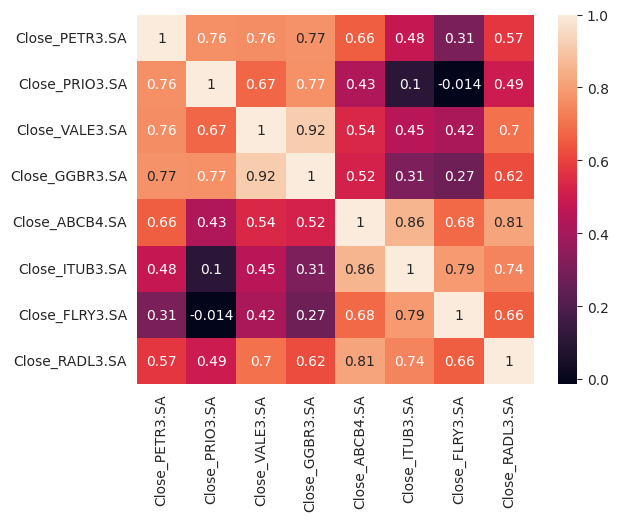

In [ ]:
# close correlation
corr_mtrx_close = data_close.corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()

Volume_PETR3.SA  Volume_PRIO3.SA  Volume_VALE3.SA  \
Volume_PETR3.SA         1.000000         0.377882         0.471579   
Volume_PRIO3.SA         0.377882         1.000000         0.537658   
Volume_VALE3.SA         0.471579         0.537658         1.000000   
Volume_GGBR3.SA        -0.002220        -0.122231        -0.132565   
Volume_ABCB4.SA         0.426542         0.422468         0.512402   
Volume_ITUB3.SA         0.076654         0.135829         0.142467   
Volume_FLRY3.SA         0.252039         0.314729         0.497934   
Volume_RADL3.SA         0.451249         0.156181         0.339393   

                 Volume_GGBR3.SA  Volume_ABCB4.SA  Volume_ITUB3.SA  \
Volume_PETR3.SA        -0.002220         0.426542         0.076654   
Volume_PRIO3.SA        -0.122231         0.422468         0.135829   
Volume_VALE3.SA        -0.132565         0.512402         0.142467   
Volume_GGBR3.SA         1.000000        -0.058598        -0.025821   
Volume_ABCB4.SA        -0.058598         1.000000         0.136546   
Volume_ITUB3.SA        -0.025821         0.136546         1.000000   
Volume_FLRY3.SA        -0.116095         0.327497         0.096550   
Volume_RADL3.SA         0.006949         0.299330         0.027579   

                 Volume_FLRY3.SA  Volume_RADL3.SA  
Volume_PETR3.SA         0.252039         0.451249  
Volume_PRIO3.SA         0.314729         0.156181  
Volume_VALE3.SA         0.497934         0.339393  
Volume_GGBR3.SA        -0.116095         0.006949  
Volume_ABCB4.SA         0.327497         0.299330  
Volume_ITUB3.SA         0.096550         0.027579  
Volume_FLRY3.SA         1.000000         0.186650  
Volume_RADL3.SA         0.186650         1.000000

None


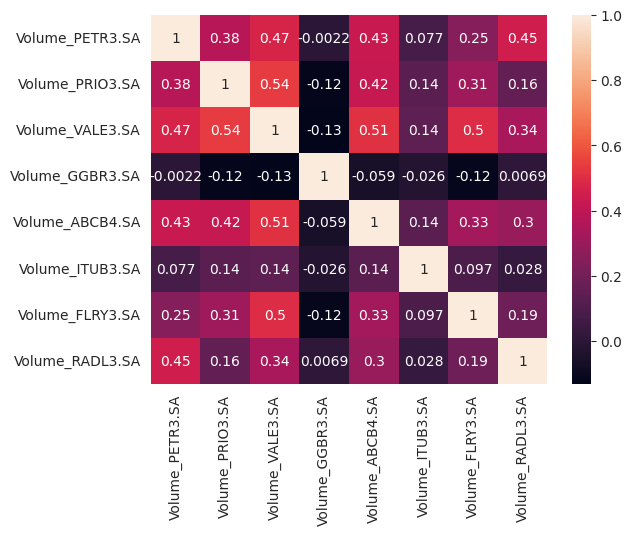

In [ ]:
# close correlation
corr_mtrx_vol = data_vol.corr()
print(display(corr_mtrx_vol))

sns.heatmap(corr_mtrx_vol, annot=True)
plt.show()

In [ ]:
# simple moving average 
window_size = 21

In [ ]:
for asset in list_assets:
    
    data[f'SMA_{window_size}_{asset}'] = data[f'Close_{asset}'].rolling(window = window_size).mean()
    data[f'MSTD_{window_size}_{asset}'] = data[f'Close_{asset}'].rolling(window = window_size).std()

In [ ]:
# plot all history with matplot (plotly is better for that) 

# for asset in list_assets:
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.plot(data[f'Close_{asset}'], label = f'Close {asset}')
#     ax.plot(data[f'SMA_{window_size}_{asset}'], label = f'SMA {window_size} {asset}')

#     plt.legend()
#     plt.show()

In [ ]:
for asset in list_assets:

    # Create traces
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[f'Close_{asset}'],
                        mode='lines',
                        name=f'Close {asset}'))
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[f'SMA_{window_size}_{asset}'],
                        mode='lines',
                        name=f'SMA {window_size} {asset}'))
    std_2_plt = [1]
    for std in std_2_plt:
        
        upper = data[f'SMA_{window_size}_{asset}'] + std * data[f'MSTD_{window_size}_{asset}']
        lower = data[f'SMA_{window_size}_{asset}'] - std * data[f'MSTD_{window_size}_{asset}']
        
        fig.add_trace(go.Scatter(
            x = data.index,
            y = upper,
            mode='lines',
            name=f'Upper Bound (std {std})'))
        fig.add_trace(go.Scatter(
            x = data.index,
            y = lower,
            mode='lines',
            fill='tonexty',
            name=f'Lower Bound (std {std})'))
            
    fig.update_layout(
    title=f"{asset}",
    hovermode="x")

    fig.show()